# SENG 474
# Assignment 3 - Problem 1
# Nolan Kurylo
# V00893175
To execute notebook, ensure ALL cells are run from top to bottom (since imports/df creation are only called once)

References:

1) https://towardsdatascience.com/k-means-and-pca-for-image-clustering-a-visual-analysis-8e10d4abba40

2) https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

3) https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

In [1]:
# 1.1 Dataset
from keras.datasets import  fashion_mnist
import numpy as np
import pandas as pd

np.random.seed(1337)

(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

test_X = test_X.reshape(-1, 784) #flatten 28x28 pixels to 784x1 pixels

# find the indexs for all rows of each class
idx_0 = np.where(test_y == 0)[0][500:] # T-shirt/top
idx_1 = np.where(test_y == 1)[0][500:] # Trouser
idx_2 = np.where(test_y == 2)[0][500:] # Pullover
idx_3 = np.where(test_y == 3)[0][500:] # Dress
idx_4 = np.where(test_y == 4)[0][500:] # Coat
idx_5 = np.where(test_y == 5)[0][500:] # Sandal
idx_6 = np.where(test_y == 6)[0][500:] # Shirt
idx_7 = np.where(test_y == 7)[0][500:] # Sneaker
idx_8 = np.where(test_y == 8)[0][500:] # Bag
idx_9 = np.where(test_y == 9)[0][500:] # Ankle boot

# truncate the all classes in the dataset by 500 rows
remove_idxs = np.concatenate((idx_0, idx_1, idx_2, idx_3, idx_4, idx_5, idx_6, idx_7, idx_8, idx_9))
X = np.delete(test_X, remove_idxs, axis=0)
y = np.delete(test_y, remove_idxs, axis=0)

print("Ensure dataset downsampled to 5000 elements")
print("X row size: " + str(X.shape[0]))
print("y row size: " + str(y.shape[0]))
print()
print("Ensure each class contains 500 items")
print("Class 0 row size: " + str(len(np.where(y == 0)[0])))
print("Class 1 row size: " + str(len(np.where(y == 1)[0])))
print("Class 2 row size: " + str(len(np.where(y == 2)[0])))
print("Class 3 row size: " + str(len(np.where(y == 3)[0])))
print("Class 4 row size: " + str(len(np.where(y == 4)[0])))
print("Class 5 row size: " + str(len(np.where(y == 5)[0])))
print("Class 6 row size: " + str(len(np.where(y == 6)[0])))
print("Class 7 row size: " + str(len(np.where(y == 7)[0])))
print("Class 8 row size: " + str(len(np.where(y == 8)[0])))
print("Class 9 row size: " + str(len(np.where(y == 9)[0])))


Ensure dataset downsampled to 5000 elements
X row size: 5000
y row size: 5000

Ensure each class contains 500 items
Class 0 row size: 500
Class 1 row size: 500
Class 2 row size: 500
Class 3 row size: 500
Class 4 row size: 500
Class 5 row size: 500
Class 6 row size: 500
Class 7 row size: 500
Class 8 row size: 500
Class 9 row size: 500


1.1 Dataset

The above script ensures that each class contains 500 samples for a total of 5000 samples. This preprocessing will allow for cleaner and quicker execution of the algorithms that follow in the next parts of the question. These algorithms involve PCA and t-SNE.

Top 5 Principal Components (Eigenfaces):


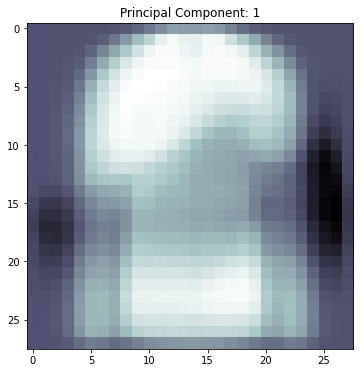

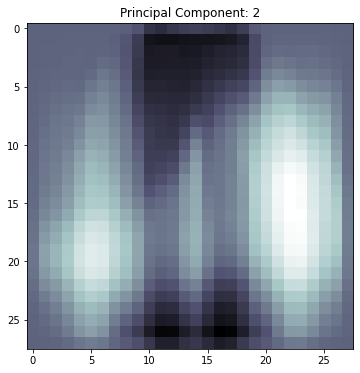

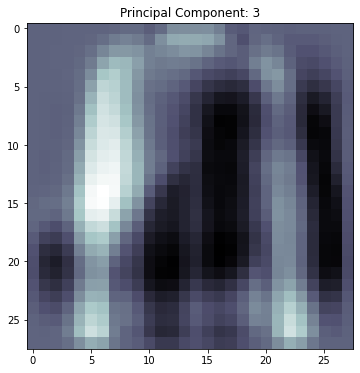

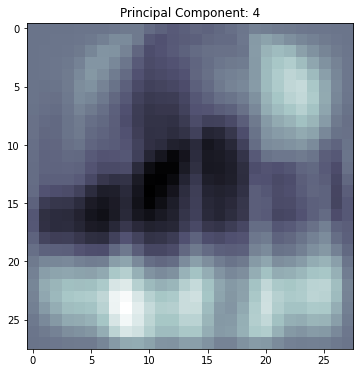

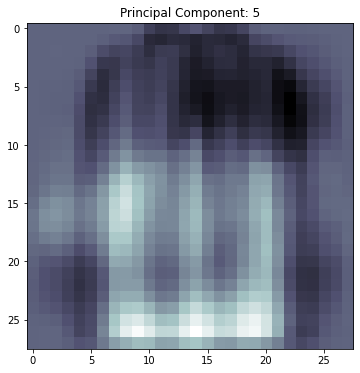

Before PCA, There are 784 components
After PCA, There are 24 components
To explain 80.0% of the variance, d = 24 components are needed


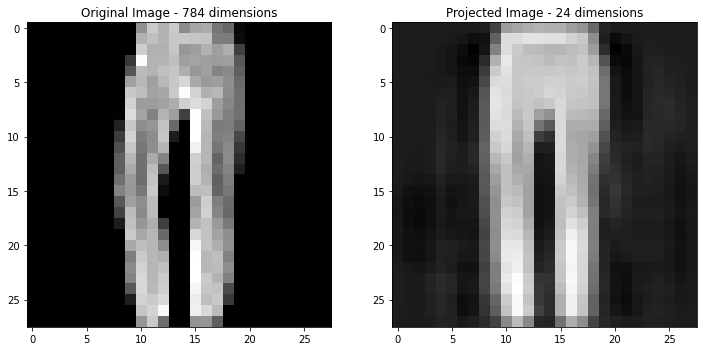

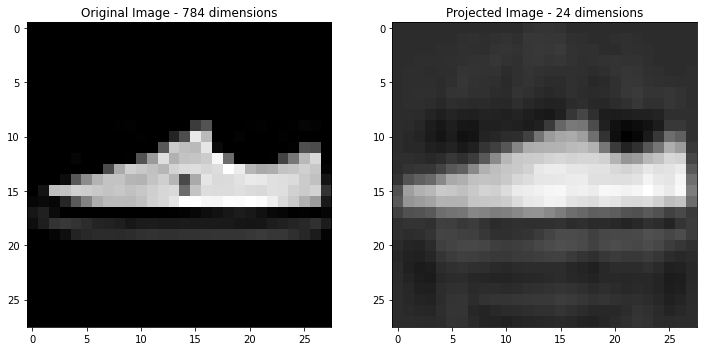

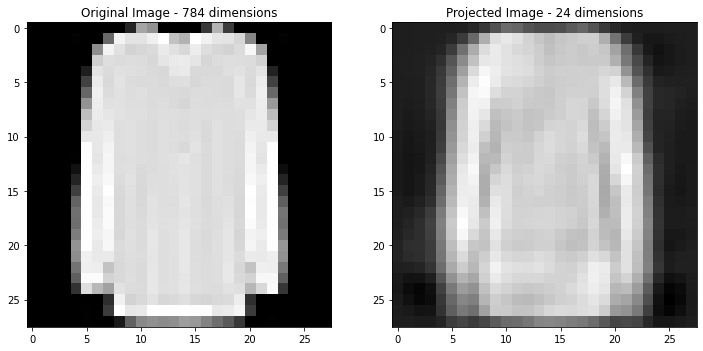

In [2]:
# 1.2 Dimensionality
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


explained_variance = 0.8 # 80% explained variance

pca = PCA(explained_variance).fit(X) # fit the model

# Plot top 5 principal components
print("Top 5 Principal Components (Eigenfaces):")



for i in range(5):
    plt.figure(figsize=(6,6))
    plt.title("Principal Component: " + str(i+1))
    plt.imshow(pca.components_[i].reshape(28,28), cmap='bone')
    plt.show()
    
X_pca_reduced = pca.transform(X) # reduce the dimensions of X using PCA

df = pd.DataFrame(X_pca_reduced) # output to csv for Problem 2
df['label'] = pd.DataFrame(y)
df.to_csv("fashion_mnist_pca.csv", index=False)

num_components_before = X.shape[1] # number of components before PCA
d = X_pca_reduced.shape[1] # number of components after PCA needed to explain 80% of variance
print("Before PCA, There are " + str(num_components_before) + " components")
print("After PCA, There are " + str(d) + " components")
print("To explain " + str(explained_variance *100) + "% of the variance, d = " + str(d) + " components are needed")

X_pca = pca.inverse_transform(X_pca_reduced) #approximation after converting back to 784 dimensions

random_idxs = np.random.choice(X.shape[0], 3) 

for idx in random_idxs: # print 3 random images and compare them to the PCA reduced images
    
    plt.figure(figsize=(12,12))
    plt.subplot(1,2,1)
    plt.title("Original Image - " + str(num_components_before) +" dimensions")
    X_image = X[idx].reshape(28, 28)
    plt.imshow(X_image, cmap='gray')
    plt.subplot(1,2,2)
    plt.title("Projected Image - " + str(d) +" dimensions")
    X_image_pca = X_pca[idx].reshape(28, 28)
    plt.imshow(X_image_pca, cmap='gray')
    plt.show()
    

1.2 Dimensionality

The eigenface images that represent the top 5 principal components of the PCA reduction outline how the shoe-like, shirt-like and pant-like classes are the basis of a large majority of the images in the dataset. This means that PCA predicts that a combination of mainly these eigenfaces (but not just these 5) would be able to produce any image from this dataset. 

To explain 80% of the variance the number of d components needed is 24 (d = 24). The 3 randomly chosen images from the dataset are compared to their 24-dimensional representation after converting back from PCA. It goes to show how the major features of the original image are for the most part maintained, however, it is easily noticeable that the dimensionality reduction results in an approximation as the pixelation in the reduced image is slightly different than the original.

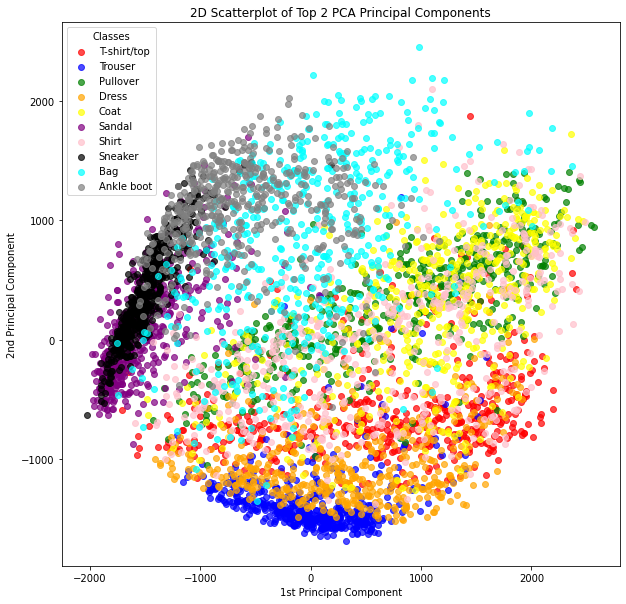

In [3]:
# 1.3 Plot

plt.figure(figsize=(10,10))
colours = {0: 'red', 1:'blue', 2: 'green', 3:'orange', 4:'yellow', 5:'purple', 6:'pink', 7:'black', 8:'cyan', 9:'grey'} # classes and assigned corresponding colour

for class_colour in colours:
    class_rows = y == class_colour
    plt.scatter(x=X_pca_reduced[class_rows,0], y=X_pca_reduced[class_rows,1], c=colours[class_colour], label=class_colour, alpha=0.7 )

plt.title("2D Scatterplot of Top 2 PCA Principal Components")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.legend(title = "Classes", labels= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.show()




1.3 Plot

The 2D scatterplot generated above shows the actual label of each point by the colour. While the first two principal components explain a significant proportion of the variance, it would be difficult to distinguish some points in each class without knowing the label's colour in the plot beforehand. This is especially the case for more centralized classes in the plot. Pullover, bag, coat, shirt, t-shirt/top, are the classes that exhibit this indisguishability issue. As for the rest of the classes, there is quite a bit of overlap, meaning that it would be hard to decipher which point belongs to each class without knowing the class colours in advance as well.

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.004s...
[t-SNE] Computed neighbors for 5000 samples in 1.345s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 324.260035
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.472198
[t-SNE] KL divergence after 1000 iterations: 1.501704


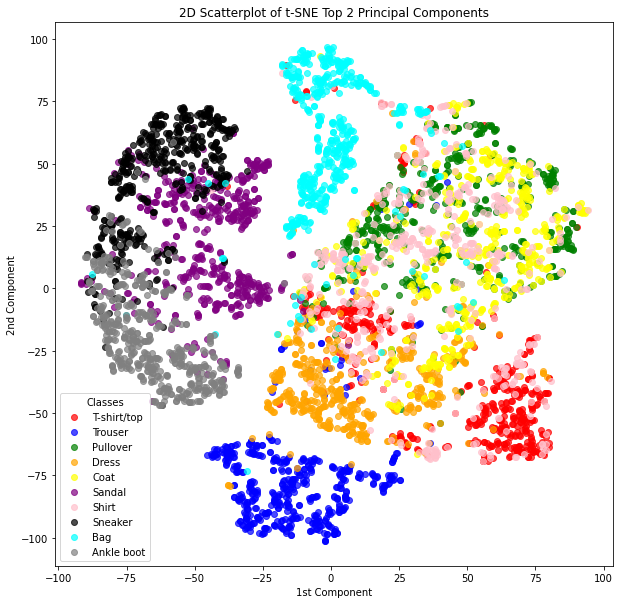

In [4]:
# 1.4 SNE
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=10, learning_rate=150, angle=0.1, verbose=1) 

X_tsne_reduced = tsne.fit_transform(X) # reduce data via t-SNE dimensionality reduction algorithm

plt.figure(figsize=(10,10))
colours = {0: 'red', 1:'blue', 2: 'green', 3:'orange', 4:'yellow', 5:'purple', 6:'pink', 7:'black', 8:'cyan', 9:'grey'} # classes and assigned corresponding colour

for class_colour in colours: # plot 2D scatterplot of reduced data
    class_rows = y == class_colour
    plt.scatter(x=X_tsne_reduced[class_rows,0], y=X_tsne_reduced[class_rows,1], c=colours[class_colour], label=class_colour, alpha=0.7 )

plt.title("2D Scatterplot of t-SNE Top 2 Principal Components")
plt.xlabel("1st Component")
plt.ylabel("2nd Component")
plt.legend(title = "Classes", labels= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.show()

1.4 SNE

In comparison to the dimensionality reduction of PCA, t-SNE takes a significantly longer amount of time to reduce dimensions (a reason why PCA is prefered). The t-SNE scatterplot is a lot more informative of some classes as they are more closely grouped together due to the algorithm's use of the Kullback-Leibler Divergence between points. As seen in the PCA scatterplot, some of the centralized classes are so scrambled that it is impossible to predict which point belongs to which class. This occurs for the classes: dress, shirt, t-shirt/top, pullover, and coat. This could be due to how the images are similar based on their their pixelation distributions. Some of the other classes are a lot more isolated; such as the trouser and bag classes. While the classes can more easily be distinguished in the t-SNE scatterplot that the PCA scatterplot, there is still quite a bit of overlap between classes. To avoid this, optimizations were performed by varying the number of iterations, angle size of nearby points and the number of nearest neighbours: perplexity.